In [1]:
import sys
sys.path.append('../backend/')
from functions import *

import seaborn as sns
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
#import plotly.express as px

C:\Users\scottn\Anaconda3\envs\SJU_DS\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
result=get_calendar(race_year=2024, race_month=3, race_day=17, weeks=12, pace_min=6, pace_sec=15, race_dist=13.1)

print('raw level: ', result[1])
print('dist level: ', result[2])
print('z2: ', pace_to_str(result[10]))
print('mp: ', pace_to_str(result[9]))
print('hmp: ', pace_to_str(result[8]))
print('10k: ', pace_to_str(result[7]))
print('5k: ', pace_to_str(result[6]))
result[0][['date', 'day_desc', 'week', 'phase', 'distance', 'run_type', 'run_name', 'pace', 'run_desc']].to_csv('TwoRivers2.csv', index=False)

raw level:  8.170415780829998
dist level:  [8.170415780829998]
z2:  8'16''
mp:  6'49''
hmp:  6'15''
10k:  5'59''
5k:  5'52''


In [13]:
result[0].groupby(['week'])['distance'].sum().reset_index().to_csv('DallasNYCHalf_Volume.csv', index=False)

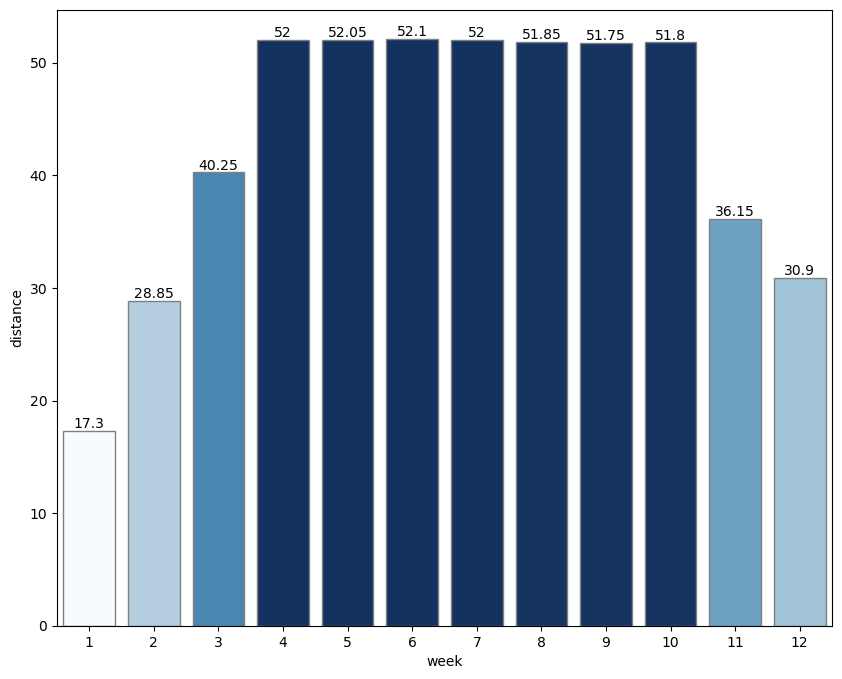

In [14]:
df_vol = result[0].groupby(['week'])['distance'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_vol, x='week', y='distance', edgecolor='grey', 
            palette=plt.cm.ScalarMappable(cmap='Blues').to_rgba(df_vol['distance']), ax=ax)

ax.bar_label(ax.containers[0]);

plt.savefig('DallasNYCHalf_Volume.jpg')

# DB Connection

In [5]:
import psycopg2

In [ ]:
def get_data(env_path, query):
    load_dotenv(env_path)
    #read in sql query
    f=open(query)
    query_main=f.readlines()
    f.close()
    ### Setup snowflake connector
    ctx = snowflake.connector.connect(
        user=os.getenv('uid_snow'), 
        password=os.getenv('pwd_snow'), 
        account=os.getenv('account_snow'))
    cs = ctx.cursor()
    cs.execute('USE DATABASE BANNER_DB')
    cs.execute('USE SCHEMA BANNER_LND')
    cs.execute("".join(query_main))
    ### Turn into pandas data frame
    D = cs.fetchall()
    col_nms=[x.name for x in cs.description]
    df=pd.DataFrame(D)
    df.columns=col_nms
    ### Close connections
    cs.close()
    ctx.close()    
    return df

In [36]:
ENDPOINT="mc-db.curuzcat1uwx.us-east-2.rds.amazonaws.com"
PORT="5432"
USER="mydbuser"
REGION="us-east-2c"
DBNAME="postgres"

In [37]:
try:
    conn = psycopg2.connect(host=ENDPOINT, port=PORT, database='postgres', user='scottn_sql', password='299Adelphist..')
    cur = conn.cursor()
    cur.execute("""SELECT * FROM USERS""")
    query_results = cur.fetchall()
    col_nms=[x.name for x in cur.description]
    df=pd.DataFrame(query_results)
    df.columns=col_nms
except Exception as e:
    print("Database connection failed due to {}".format(e))  
#cur.close()
#conn.close()

df

Database connection failed due to Length mismatch: Expected axis has 0 elements, new values have 7 elements


""


In [38]:
cur.description

(Column(name='user_id', type_code=20),
 Column(name='first_name', type_code=1043),
 Column(name='last_name', type_code=1043),
 Column(name='email', type_code=25),
 Column(name='pwd', type_code=25),
 Column(name='terms', type_code=16),
 Column(name='created', type_code=1114))

In [39]:
cur.close()
conn.close()

In [26]:
conn = psycopg2.connect(host=ENDPOINT, port=PORT, database='postgres', user='scottn_sql', password='299Adelphist..')
cur = conn.cursor()
cur.execute("TRUNCATE TABLE USERS")
conn.commit()

In [24]:
cur.description

In [29]:
conn = psycopg2.connect(host=ENDPOINT, port=PORT, database='postgres', user='scottn_sql', password='299Adelphist..')
cur = conn.cursor()
cur.execute("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());")
conn.commit()

In [30]:
cur.close()
conn.close()

In [17]:
print("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());")

INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) VALUES (DEFAULT, 'New', 'Name', 'email', 'testpw', NOW());


In [32]:
last = 'scott'
first = 'nick'
email = 'nickxscott@gmail.com'
pwd = 'test_pwd'
terms = True

In [35]:
print("INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED) \
        VALUES (DEFAULT, " +"'"+  first +"', '" + last +"', '"+ email +"', '"+ pwd +"', true, NOW());")

INSERT INTO USERS (USER_ID, FIRST_NAME, LAST_NAME, EMAIL, PWD, CREATED)         VALUES (DEFAULT, 'nick', 'scott', 'nickxscott@gmail.com', 'test_pwd', true, NOW());


In [40]:
import os
from dotenv import load_dotenv

load_dotenv('../pg.env')

True